In [11]:
using Plots
using PlotlyJS
using Gen

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-18098166710745600456\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-771912458225542595\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-18098166710745600456\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [2]:
# fixed camera y perspective
ycamera = 70
# ToDo discuss the selected parameter of the simulation
slope_value = 0
intercept_value = 0
xcamera_value = 50.
prob_different_rail_types = 0.5

0.5

In [31]:
@gen function straight_rails(xstart::Float64, xend::Float64)
    xstart = @trace(normal(xstart, 1), :xstart)
    xend = @trace(normal(xend,1), :xend)

    slope = @trace(normal(slope_value, 1), :slope)
    intercept = @trace(normal(intercept_value, 1), :intercept)
    
    xcamera = @trace(normal(xcamera_value, 1), :xcamera)
    #ycamera = @trace(normal(50., 10), :ycamera)
    
    return 1
end;

function render_trace(trace)
    
    xs = [trace[:xstart],trace[:xend] ]
    
    slope = trace[:slope]
    intercept = trace[:intercept]
    z =range(0.,stop=0.0,length=length(xs))
    # Draw the line
    plotly()
    p = plot([xs, xs], [((xs.*slope) .+intercept), ((xs .* slope) .+ intercept .+ 2)] , [z, z], legend=false, grid=false, axis=false,
        KW(
            :include_mathjax => "",
            :layout.scene.camera => [:up => [x: => 0, y: => 0, z: => 10]])
        #xlim = (0, x_lim), discussable if we take a coordinate system
        #ylim = (0, y_lim),
        #zlim = (0, z_lim))
    return p
end;


@gen function rail_curve(xstart::Float64, xend::Float64, radius::Float64)
    xs = @trace(normal(xstart, 1), :xstart)
    xe = @trace(normal(xend, 1), :xend)
    slope = @trace(normal(slope_value, 1), :slope)
    yradius = @trace(normal(radius, 1), :yradius)
    xcamera = @trace(normal(xcamera_value, 1), :xcamera)

  
    return 1
end;


function render_trace_curves(trace)
    
    # Pull out xs from the trace
    #xs = get_args(trace)[1]
    
    #xmin = minimum(xs)
    #xmax = maximum(xs)
    #y_r1 = [trace[(:r1, i)] for i=1:length(xs)]
    #y_r2 = [trace[(:r2, i)] for i=1:length(xs)]
    x = range(trace[:xstart], trace[:xend], length=10)
    # Pull out slope and intercept from the trace
    z =range(0.,stop=0.0,length=length(x))
    # Draw the line
    f = (sqrt.(trace[:yradius]^2 .- (x .^ 2))) .* trace[:slope]
    p = plot([x, x], [f, f .+ 2] , [z, z],
        camera=(trace[:xcamera], ycamera ), legend=false, grid=false, axis=false)
        #xlim = (0, x_lim),
        #ylim = (0, y_lim),
        #zlim = (0, z_lim))
    return p
end;

@gen function combined_model(xstart::Float64, xend::Float64, radius::Float64)
    if @trace(bernoulli(prob_different_rail_types), :is_line)
        @trace(straight_rails(xstart, xend))
    else
        @trace(rail_curve(xstart, xend, radius))
    end
end;

function render_combined(trace)
    if trace[:is_line]
        render_trace(trace)
    else
        render_trace_curves(trace)
    end
end;

function save_image(p, c)
    #name = rand(Int, 1)
    name = "simulated_data/" * string(c) * ".png"
    savefig(p, name)
    end;


LoadError: syntax: "=>" is not a unary operator

In [28]:
trace1 = Gen.simulate(straight_rails, (0.0,100.,));
p = render_trace(trace1)
#save_image(p, 1)
p

LoadError: Couldn't process recipe args: (Vector{Vector{Float64}}, Vector{Vector{Float64}}, Vector{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}}, Dict{Symbol, Any})

In [20]:
KW(:eye => [10,20,100])

Dict{Symbol, Any} with 1 entry:
  :eye => [10, 20, 100]

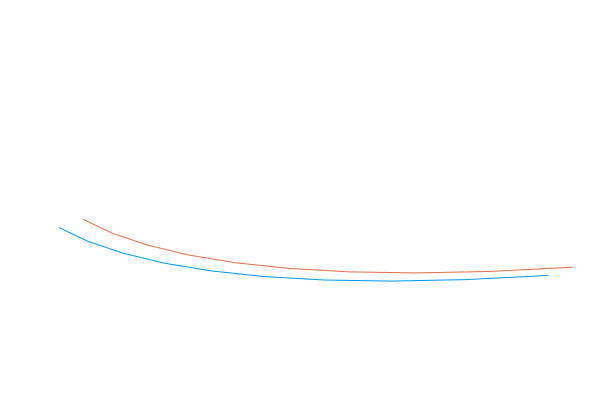

In [74]:
trace1 = Gen.simulate(rail_curve, (0.0, 100., 200.,));
p = render_trace_curves(trace1);
p

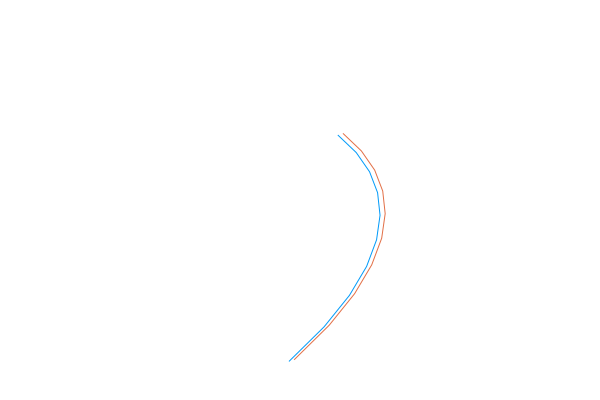

In [86]:
trace = Gen.simulate(combined_model, (10., 100., 150.,));
p = render_combined(trace);
p

In [87]:
# only straight rails
#traces = [Gen.simulate(straight_rails, (0., 300.,)) for _=1:50];
#for i in 1:50
#    p = render_trace(traces[i]);
#    save_image(p, i)
#    end;


traces = [Gen.simulate(combined_model, (10., 200., 250.,)) for _=1:50];
for i in 1:50
    p = render_combined(traces[i]);
    save_image(p, i)
end;


In [33]:
using Noise
# To DO add gaussian noise to images

┌ Info: Precompiling Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1317
